In [142]:
import pandas as pd

In [193]:
df = pd.read_csv("../원본데이터/한국서부발전_시간별_발전량_utf-8_20231231.csv", encoding = "utf-8")

In [195]:
df

,날짜,발전기명,설비용량(MW),시간,해당 시간 발전량(kWh),해당날짜 총 발전량(kMh)
0,2023-01-01,(군산)영암F1태양광,13.296,01시,0.0,40588.800
1,2023-01-02,(군산)영암F1태양광,13.296,01시,0.0,57024.000
2,2023-01-03,(군산)영암F1태양광,13.296,01시,0.0,48672.000
3,2023-01-04,(군산)영암F1태양광,13.296,01시,0.0,40742.400
4,2023-01-05,(군산)영암F1태양광,13.296,01시,0.0,23913.600
...,...,...,...,...,...,...
52531,2023-12-27,"태안#9,10 수상태양광",1.836,24시,0.0,3847.379
52532,2023-12-28,"태안#9,10 수상태양광",1.836,24시,0.0,1642.835
52533,2023-12-29,"태안#9,10 수상태양광",1.836,24시,0.0,1756.007
52534,2023-12-30,"태안#9,10 수상태양광",1.836,24시,0.0,307.524


In [145]:
# 발전기명이 (군산)삼랑진태양광인 행에서 설비용량(MW)의 고유값 추출
unique_capacity = df[df['발전기명'] == '(군산)삼랑진태양광']['설비용량(MW)'].unique()
print(unique_capacity)

[2.]


In [146]:
# 삼랑진 태양광 설비용량 3MW로 수정
df.loc[df['발전기명'] == '(군산)삼랑진태양광', '설비용량(MW)'] = 3

unique_capacity = df[df['발전기명'] == '(군산)삼랑진태양광']['설비용량(MW)'].unique()
print(unique_capacity)

[3.]


In [147]:
filtered_df = df[df['발전기명'] == '(군산)삼랑진태양광']
filtered_df

,날짜,발전기명,설비용량(MW),시간,해당 시간 발전량(kWh),해당날짜 총 발전량(kMh)
365,2023-01-01,(군산)삼랑진태양광,3.0,01시,0.0,6076.440
366,2023-01-02,(군산)삼랑진태양광,3.0,01시,0.0,7648.740
367,2023-01-03,(군산)삼랑진태양광,3.0,01시,0.0,8238.960
368,2023-01-04,(군산)삼랑진태양광,3.0,01시,0.0,7503.480
369,2023-01-05,(군산)삼랑진태양광,3.0,01시,0.0,5305.680
...,...,...,...,...,...,...
51437,2023-12-27,(군산)삼랑진태양광,3.0,24시,0.0,3851.616
51438,2023-12-28,(군산)삼랑진태양광,3.0,24시,0.0,3715.488
51439,2023-12-29,(군산)삼랑진태양광,3.0,24시,0.0,3768.768
51440,2023-12-30,(군산)삼랑진태양광,3.0,24시,0.0,2871.168


In [148]:
subset_df = filtered_df[(filtered_df['날짜'] == '2023-01-01') & (filtered_df['시간'] == '01시')]
subset_df

,날짜,발전기명,설비용량(MW),시간,해당 시간 발전량(kWh),해당날짜 총 발전량(kMh)
365,2023-01-01,(군산)삼랑진태양광,3.0,01시,0.0,6076.440
396,2023-01-01,(군산)삼랑진태양광,3.0,01시,0.0,3351.072


In [149]:
subset_df2 = filtered_df[(filtered_df['날짜'] == '2023-01-01') & (filtered_df['시간'] == '02시')]
subset_df2

,날짜,발전기명,설비용량(MW),시간,해당 시간 발전량(kWh),해당날짜 총 발전량(kMh)
2554,2023-01-01,(군산)삼랑진태양광,3.0,02시,0.0,6076.440
2585,2023-01-01,(군산)삼랑진태양광,3.0,02시,0.0,3351.072


In [150]:
filtered_df = (
    filtered_df
    .groupby(['날짜', '시간'], as_index=False)
    .agg({
        '발전기명': 'first',
        '설비용량(MW)': 'first',
        '해당 시간 발전량(kWh)': 'sum',
        '해당날짜 총 발전량(kMh)': 'first'
    })
)
filtered_df.head(3)

,날짜,시간,발전기명,설비용량(MW),해당 시간 발전량(kWh),해당날짜 총 발전량(kMh)
0,2023-01-01,01시,(군산)삼랑진태양광,3.0,0.0,6076.44
1,2023-01-01,02시,(군산)삼랑진태양광,3.0,0.0,6076.44
2,2023-01-01,03시,(군산)삼랑진태양광,3.0,0.0,6076.44


In [151]:
# 날짜와 시간 기준으로 총 발전량 합계 구해서 같은 값으로 덮어쓰기
filtered_df['해당날짜 총 발전량(kMh)'] = (
    filtered_df
    .groupby(['날짜', '시간'])['해당날짜 총 발전량(kMh)']
    .transform('sum')
)
filtered_df

,날짜,시간,발전기명,설비용량(MW),해당 시간 발전량(kWh),해당날짜 총 발전량(kMh)
0,2023-01-01,01시,(군산)삼랑진태양광,3.0,0.0,6076.44
1,2023-01-01,02시,(군산)삼랑진태양광,3.0,0.0,6076.44
2,2023-01-01,03시,(군산)삼랑진태양광,3.0,0.0,6076.44
3,2023-01-01,04시,(군산)삼랑진태양광,3.0,0.0,6076.44
4,2023-01-01,05시,(군산)삼랑진태양광,3.0,0.0,6076.44
...,...,...,...,...,...,...
8755,2023-12-31,20시,(군산)삼랑진태양광,3.0,0.0,2310.84
8756,2023-12-31,21시,(군산)삼랑진태양광,3.0,0.0,2310.84
8757,2023-12-31,22시,(군산)삼랑진태양광,3.0,0.0,2310.84
8758,2023-12-31,23시,(군산)삼랑진태양광,3.0,0.0,2310.84


In [152]:
#설비용량, 해당 시간 발전량, 해당날짜 총 발전량 변경한 삼랑진 데이터만 따로 csv파일 저장
filtered_df.to_csv("filtered_output_삼랑진.csv", index=False, encoding="utf-8")


In [166]:
df["발전기명"].unique()


array(['(군산)영암F1태양광', '(군산)삼랑진태양광', '장흥풍력', '화순풍력발전', '태안#9,10 수상태양광'],
      dtype=object)

In [168]:
df_SOLAR = df[df["발전기명"].isin(["(군산)영암F1태양광", "태안#9,10 수상태양광"])]
df_SOLAR

,날짜,발전기명,설비용량(MW),시간,해당 시간 발전량(kWh),해당날짜 총 발전량(kMh)
0,2023-01-01,(군산)영암F1태양광,13.296,01시,0.0,40588.800
1,2023-01-02,(군산)영암F1태양광,13.296,01시,0.0,57024.000
2,2023-01-03,(군산)영암F1태양광,13.296,01시,0.0,48672.000
3,2023-01-04,(군산)영암F1태양광,13.296,01시,0.0,40742.400
4,2023-01-05,(군산)영암F1태양광,13.296,01시,0.0,23913.600
...,...,...,...,...,...,...
52531,2023-12-27,"태안#9,10 수상태양광",1.836,24시,0.0,3847.379
52532,2023-12-28,"태안#9,10 수상태양광",1.836,24시,0.0,1642.835
52533,2023-12-29,"태안#9,10 수상태양광",1.836,24시,0.0,1756.007
52534,2023-12-30,"태안#9,10 수상태양광",1.836,24시,0.0,307.524


In [176]:
df_SOLAR["발전기명"].value_counts()

발전기명
(군산)영암F1태양광      8760
태안#9,10 수상태양광    8736
Name: count, dtype: int64

In [178]:
df_SOLAR = pd.concat([df_SOLAR, filtered_df], ignore_index=True)
df_SOLAR

,날짜,발전기명,설비용량(MW),시간,해당 시간 발전량(kWh),해당날짜 총 발전량(kMh)
0,2023-01-01,(군산)영암F1태양광,13.296,01시,0.0,40588.80
1,2023-01-02,(군산)영암F1태양광,13.296,01시,0.0,57024.00
2,2023-01-03,(군산)영암F1태양광,13.296,01시,0.0,48672.00
3,2023-01-04,(군산)영암F1태양광,13.296,01시,0.0,40742.40
4,2023-01-05,(군산)영암F1태양광,13.296,01시,0.0,23913.60
...,...,...,...,...,...,...
26251,2023-12-31,(군산)삼랑진태양광,3.000,20시,0.0,2310.84
26252,2023-12-31,(군산)삼랑진태양광,3.000,21시,0.0,2310.84
26253,2023-12-31,(군산)삼랑진태양광,3.000,22시,0.0,2310.84
26254,2023-12-31,(군산)삼랑진태양광,3.000,23시,0.0,2310.84


In [180]:
df_SOLAR["발전기명"].value_counts()

발전기명
(군산)영암F1태양광      8760
(군산)삼랑진태양광       8760
태안#9,10 수상태양광    8736
Name: count, dtype: int64

In [184]:
df_SOLAR.to_csv("df_SOLAR_삼랑진3MW로변경.csv", index=False, encoding="utf-8")


In [202]:
df = pd.read_csv("df_SOLAR_삼랑진3MW로변경.csv",encoding="utf-8")

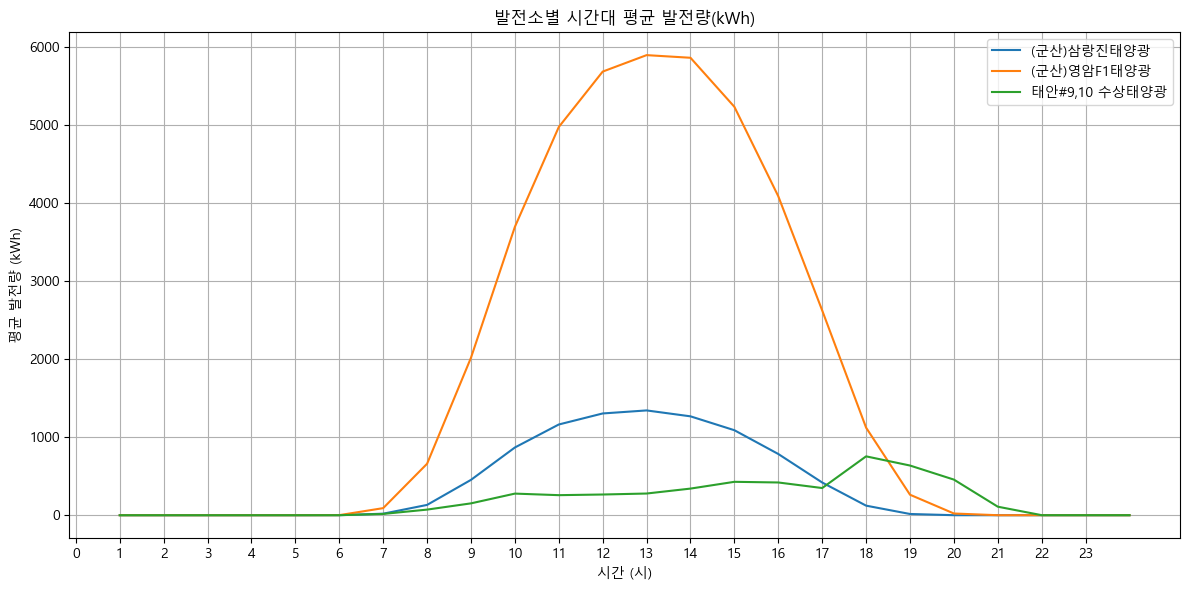

In [204]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 시간대별 평균 발전량 계산
avg_by_hour = df.groupby(["발전기명", "시간"])["해당 시간 발전량(kWh)"].mean().reset_index()

# 피벗 테이블로 재구성 (행: 시간, 열: 발전기명)
pivot_hourly = avg_by_hour.pivot(index="시간", columns="발전기명", values="해당 시간 발전량(kWh)")

# 시간 문자열 "시" 제거 → 정수형으로 변환 → 정렬
pivot_hourly.index = pivot_hourly.index.str.replace("시", "").astype(int)
pivot_hourly = pivot_hourly.sort_index()

# 그래프 시각화
plt.figure(figsize=(12, 6))
for 발전소 in pivot_hourly.columns:
    plt.plot(pivot_hourly.index, pivot_hourly[발전소], label=발전소)

plt.title("발전소별 시간대 평균 발전량(kWh)")
plt.xlabel("시간 (시)")
plt.ylabel("평균 발전량 (kWh)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


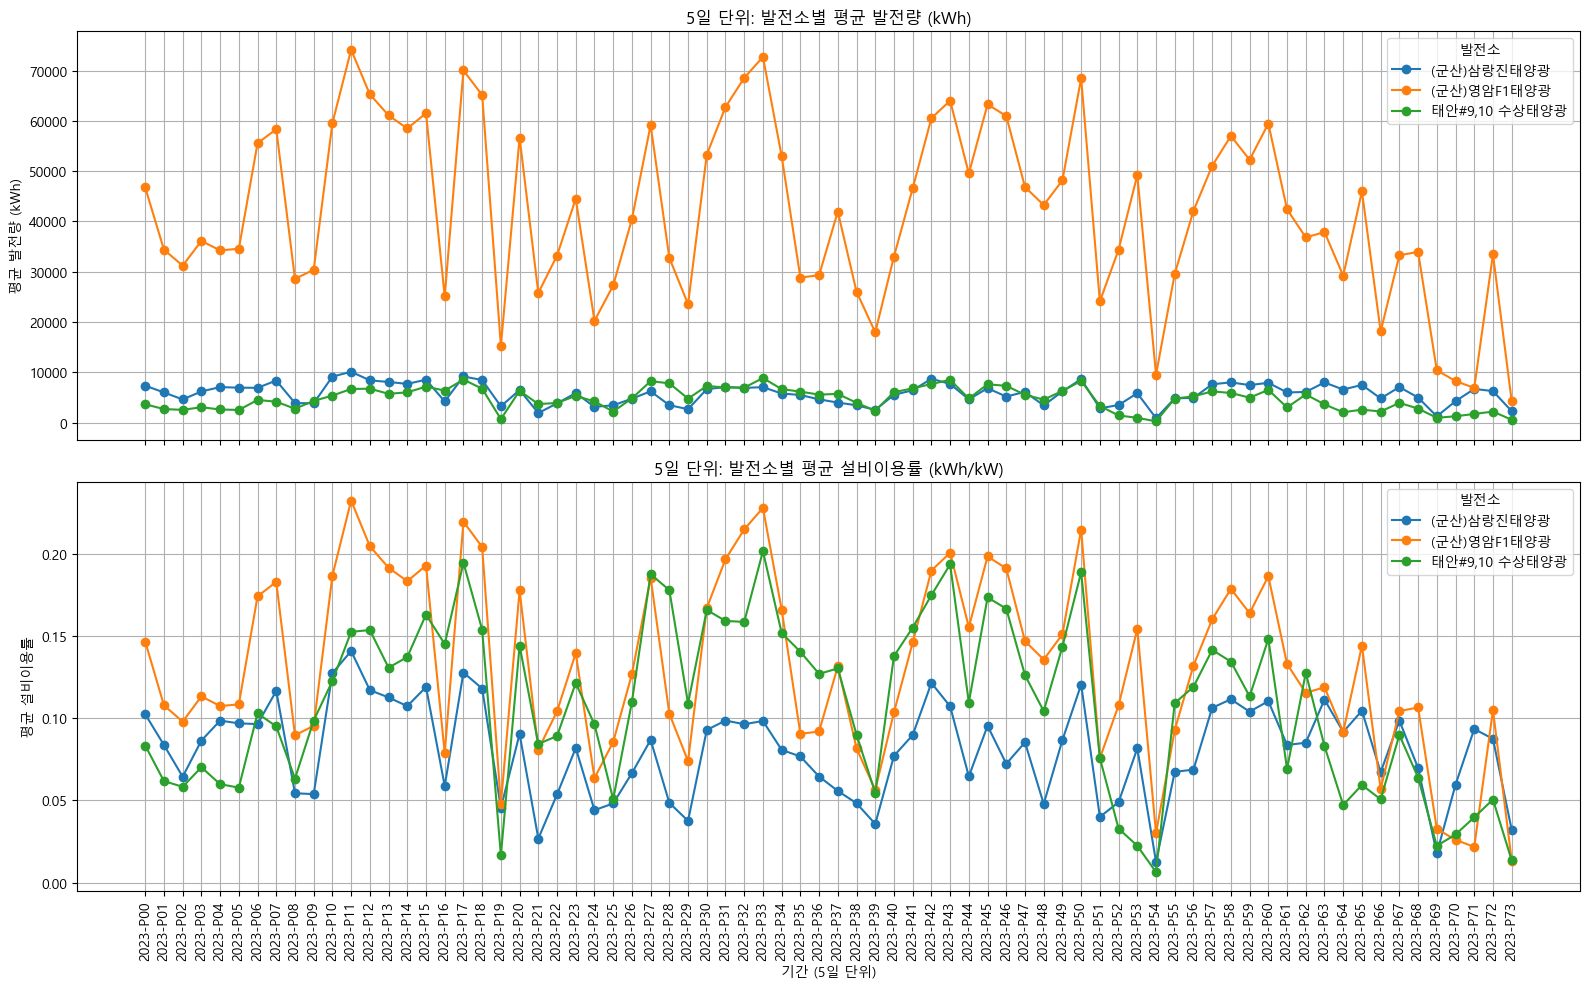

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 날짜 형식 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 5일 단위 기간 라벨 생성 (예: '2023-P01', '2023-P02' ...)
df['기간'] = (df['날짜'].dt.dayofyear // 5).astype(int)
df['기간'] = df['날짜'].dt.year.astype(str) + '-P' + df['기간'].astype(str).str.zfill(2)

# 설비이용률 다시 계산 (혹시 값이 변했을 수 있으므로)
df["설비이용률"] = df["해당날짜 총 발전량(kMh)"] / (df["설비용량(MW)"] * 24 * 1000)

# 5일 단위 평균 발전량 계산
period_avg_gen = df.groupby(['기간', '발전기명'])["해당날짜 총 발전량(kMh)"].mean().reset_index()

# 5일 단위 평균 설비이용률 계산
period_avg_util = df.groupby(['기간', '발전기명'])["설비이용률"].mean().reset_index()

# 그래프 그리기
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# 1. 평균 발전량 그래프
for name, group in period_avg_gen.groupby("발전기명"):
    axes[0].plot(group["기간"], group["해당날짜 총 발전량(kMh)"], marker='o', label=name)

axes[0].set_title("5일 단위: 발전소별 평균 발전량 (kWh)")
axes[0].set_ylabel("평균 발전량 (kWh)")
axes[0].legend(title="발전소")
axes[0].grid(True)

# 2. 평균 설비이용률 그래프
for name, group in period_avg_util.groupby("발전기명"):
    axes[1].plot(group["기간"], group["설비이용률"], marker='o', label=name)

axes[1].set_title("5일 단위: 발전소별 평균 설비이용률 (kWh/kW)")
axes[1].set_xlabel("기간 (5일 단위)")
axes[1].set_ylabel("평균 설비이용률")
axes[1].legend(title="발전소")
axes[1].grid(True)

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("발전소_5일단위_분석결과.png", dpi=300)
plt.show()
